In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score,adjusted_rand_score

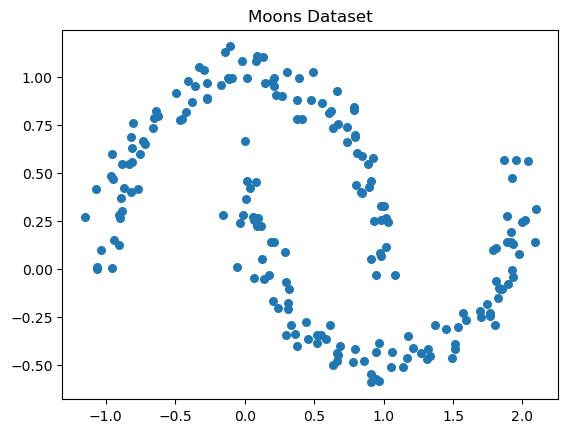

In [13]:

X,y_true = make_moons(n_samples=200, noise=0.07, random_state=42)

plt.scatter(X[:,0], X[:,1], s=30)
plt.title("Moons Dataset")
plt.show()


Silhoutte score : 0.48093362410535206
KMeans ARI: 0.22651469390970927


c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


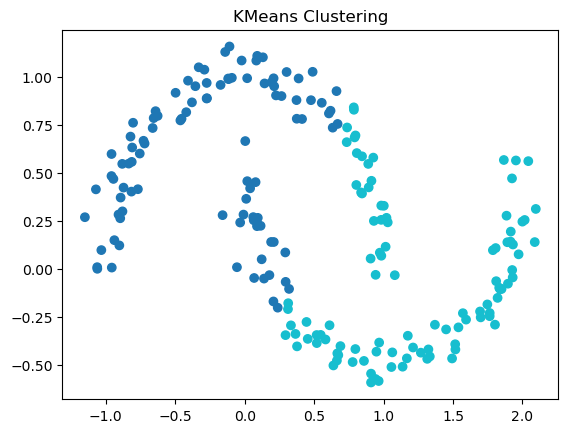

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)
sil_kmeans=silhouette_score(X, y_kmeans)
ari_kmeans=adjusted_rand_score(y_true, y_kmeans)
print("Silhoutte score :",silhouette_score(X, y_kmeans)) 
print("KMeans ARI:", adjusted_rand_score(y_true, y_kmeans))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap="tab10")
plt.title("KMeans Clustering")
plt.show()

Silhoutte score : 0.47678740517045753
Hierarchical ARI: 0.3812959087199295


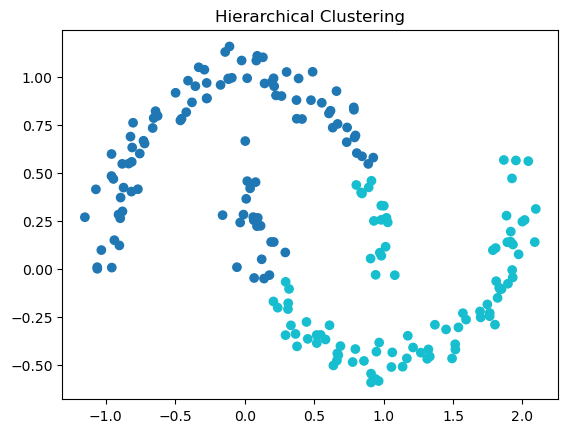

In [16]:
hier = AgglomerativeClustering(n_clusters=2)
y_hier = hier.fit_predict(X)
sil_hier=silhouette_score(X, y_hier)
ari_hier=adjusted_rand_score(y_true, y_hier)
print("Silhoutte score :",silhouette_score(X, y_hier))
print("Hierarchical ARI:", adjusted_rand_score(y_true, y_hier))
plt.scatter(X[:,0], X[:,1], c=y_hier, cmap="tab10")
plt.title("Hierarchical Clustering")
plt.show()

Silhoutte Score: -1
ARI: 0.0


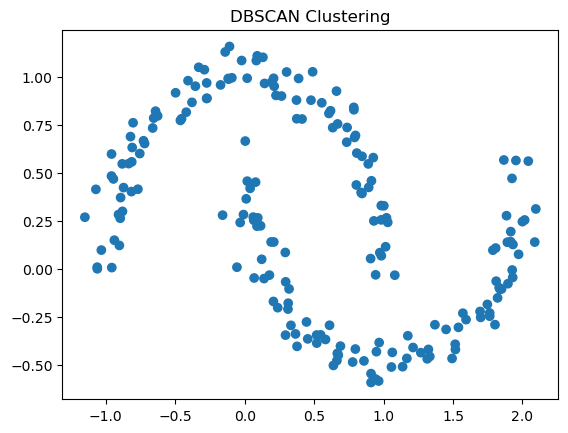

In [17]:
dbscan = DBSCAN(eps=0.8, min_samples=2)
y_dbscan = dbscan.fit_predict(X)
# DBSCAN may assign some points as -1 (outliers), must check
if len(set(y_dbscan)) > 1 and -1 in y_dbscan:
    # Compute silhouette only for non-outliers
    sil_dbscan = silhouette_score(X[y_dbscan != -1], y_dbscan[y_dbscan != -1])
elif len(set(y_dbscan)) > 1:
    sil_dbscan = silhouette_score(X, y_dbscan)
else:
    sil_dbscan = -1  # invalid clustering (all points in one cluster)
ari_dbscan = adjusted_rand_score(y_true, y_dbscan)
print("Silhoutte Score:",sil_dbscan)
print("ARI:",ari_dbscan)
plt.scatter(X[:,0], X[:,1], c=y_dbscan, cmap="tab10")
plt.title("DBSCAN Clustering")
plt.show()

In [18]:
import pandas as pd

In [19]:
results = pd.DataFrame({
    "Algorithm": ["KMeans", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [sil_kmeans, sil_hier, sil_dbscan],
    "ARI": [ari_kmeans, ari_hier, ari_dbscan]
})

print(results)

      Algorithm  Silhouette Score       ARI
0        KMeans          0.480934  0.226515
1  Hierarchical          0.476787  0.381296
2        DBSCAN         -1.000000  0.000000
